In [138]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


In [133]:
df = pd.read_csv('master.csv')

df.drop(["country-year","HDI for year"],axis=1,inplace=True)
df.rename(columns={' gdp_for_year ($) ':"gdp_year",'gdp_per_capita ($)':'gdp_per_capita'},inplace=True)

In [134]:
def comas(x):
   return x.replace(',','')
df["gdp_year"]=df["gdp_year"].map(comas)
df["gdp_year"]=df["gdp_year"].astype('int64')

In [135]:
df.head(15)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,2156624900,796,Generation X


In [136]:
df=df[["country","age","population","suicides/100k pop","gdp_per_capita"]].groupby(["country","age"]).agg(['mean','median'])
df.head()

population           suicides/100k pop         \
                              mean    median              mean median   
country age                                                             
Albania 15-24 years  277385.750000  282261.0          4.513182  4.535   
        25-34 years  227695.022727  231700.0          4.275455  3.680   
        35-54 years  362978.363636  374906.5          3.641136  3.100   
        5-14 years   320028.818182  321728.0          0.433864  0.270   
        55-74 years  189615.250000  187600.0          3.094773  2.995   

                    gdp_per_capita          
                              mean  median  
country age                                 
Albania 15-24 years    1859.045455  1213.0  
        25-34 years    1859.045455  1213.0  
        35-54 years    1859.045455  1213.0  
        5-14 years     1859.045455  1213.0  
        55-74 years    1859.045455  1213.0

In [137]:
columns=[]
for i in range(len(df.columns.levels[0])):
    for j in range(len(df.columns.levels[1])):
        columns.append("{}_{}".format(df.columns.levels[0][i],df.columns.levels[1][j]))

df.columns=columns
df.reset_index(inplace=True)
df.head()

,country,age,population_mean,population_median,suicides/100k pop_mean,suicides/100k pop_median,gdp_per_capita_mean,gdp_per_capita_median
0,Albania,15-24 years,277385.750000,282261.0,4.513182,4.535,1859.045455,1213.0
1,Albania,25-34 years,227695.022727,231700.0,4.275455,3.680,1859.045455,1213.0
2,Albania,35-54 years,362978.363636,374906.5,3.641136,3.100,1859.045455,1213.0
3,Albania,5-14 years,320028.818182,321728.0,0.433864,0.270,1859.045455,1213.0
4,Albania,55-74 years,189615.250000,187600.0,3.094773,2.995,1859.045455,1213.0


Escalando las variables y Normalizando

In [140]:
X=df.drop(columns=["country","age"])
sc = StandardScaler()
mm = MinMaxScaler()
sc.fit(X)
mm.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [141]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

VAMOS A HACER PCA PARA TRATAR DE DETERMINAR CUANTOS GRUPOS SE PODRIAN ENCONTRAR

In [142]:
pca = PCA(n_components=3)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [143]:
pca.explained_variance_ratio_.cumsum()

array([0.36835839, 0.6873367 ])

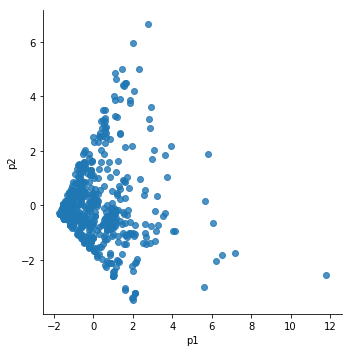

In [144]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [145]:
mds=MDS(n_components=2)

In [146]:
Xm=pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

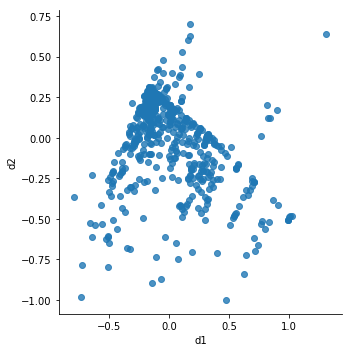

In [147]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)